In [ ]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from utils import *
from debugger import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Latex-like font for plots
# Note: if LaTeX is not installed, do not run this cell
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr10",
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}",
    "font.size": 16})

# Test
Check of the correctness of the numerical methods implemented in generating the states and estimating the correct final states dimensions, both for random generated systems and known systems.

### Random states

In [18]:
# Generate random states
dims = [4, 4] # subsystems dimensions

# Check for correctness of dimensions
# Separable state test
psi_sep = separable_pure_state(dims)
print("SEPARABLE STATE:")
print("Expected dimension:", np.sum(dims))
print("Actual dimension", np.shape(psi_sep)[0])
print(psi_sep, "\n")

# Tensor product
psi_tens = tensor_prod(dims)
print("TENSOR PRODUCT:")
print("Expected dimension:", np.prod(dims))
print("Actual dimension:", np.shape(psi_tens)[0])
print(psi_tens, "\n")

# General state test
psi_gen = general_pure_state(dims)
print("GENERAL STATE:")
general_dim = lambda d: d[0]**len(d) if len(set(d)) == 1 else np.prod(d)
print("Expected dimension:", general_dim(dims))
print("Actual dimension:", np.shape(psi_gen)[0])
print(psi_gen)

SEPARABLE STATE:
Expected dimension: 8
Actual dimension 8
[-0.11074988-0.24886024j  0.6683601 +0.18595064j -0.13285035+0.37610909j
  0.35893017+0.3957045j   0.22522032-0.27401482j -0.00147408-0.08219392j
 -0.28301946-0.04381393j  0.85638492-0.22807644j] 

TENSOR PRODUCT:
Expected dimension: 16
Actual dimension: 16
[ 0.21025456-0.18590159j  0.11461351-0.22736188j -0.12657929-0.10963105j
  0.49010966+0.11143103j  0.01941092+0.11665315j  0.05559691+0.09175677j
  0.0674515 -0.02071095j -0.14934573+0.15016181j  0.27502683+0.02170341j
  0.23902606-0.07423283j -0.00892943-0.16436589j  0.25591806+0.42262649j
 -0.09928145+0.08328536j -0.05563279+0.10357075j  0.05711098+0.05212324j
 -0.22488898-0.05731763j] 

GENERAL STATE:
Expected dimension: 16
Actual dimension: 16
[-0.24516133+0.09647272j  0.26127772-0.00355761j  0.0512749 +0.18357808j
  0.05450019-0.09969322j  0.19774362-0.27139195j -0.10111489-0.24788794j
  0.17786969-0.06166417j  0.46869211+0.10086564j -0.14279625+0.12861814j
  0.19314959+

### Known states

In [23]:
# Test if the tensor product works with two known states
psi0 = np.array([1, 0])
psi1 = np.array([0, 1])

# Set subsystems dimensions and the input vector
dims = [2, 2]
input_vecs = [psi0, psi1]
message_checkpoints(0, f"Perform tensor product calculation with: {input_vecs}", debug=True)

# Separable state
res_sep = separable_pure_state(dims, subsys_vectors=input_vecs)
print(f"Separable state: {res_sep}") 

# Tensor product
res_tensor = tensor_prod(dims, subsys_vectors=input_vecs)
print(f"Tensor product: {res_tensor}") 
print("\n")

# General state
gen_vec = np.array([1, 1, 1, 1])
print("Perform general state calculation with:", gen_vec)
res_gen = general_pure_state(dims, subsys_vectors=gen_vec)
print(f"General state: {res_gen}")

Perform tensor product calculation with: [array([1, 0]), array([0, 1])]
Separable state: [1 0 0 1]
Tensor product: [0 1 0 0]


Perform general state calculation with: [1 1 1 1]
General state: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


# Performance testing

The aim is to benchmark the code performance for $\textit{time}$ and $\textit{allocated memory}$ for both separable and general states, fixing $N=2$ and increasing $D$. 

In [5]:
# Benchmark time and memory performances
dim = 1000
t1, m1, t2, m2 = benchmark(dim)
dims = np.arange(2, dim+1)

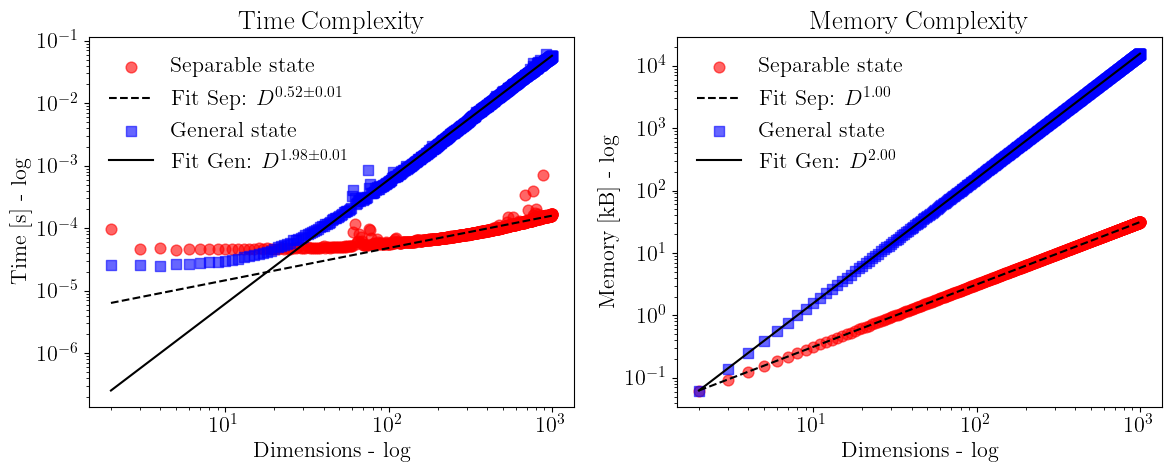

In [ ]:
# Fitting function
def f(x, a, b):
    return a*x**b


# PLOT
# Fit time data
popt_t1, pcov_t1 = curve_fit(f, dims[20:], t1[20:])
popt_t2, pcov_t2 = curve_fit(f, dims[20:], t2[20:])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: TIME
ax1.set_xscale("log")
ax1.set_yscale("log")

# Separable
ax1.scatter(dims, t1, alpha=0.6, s=60, c="red", label="Separable state")
ax1.plot(dims, f(dims, *popt_t1), c="black", linestyle="dashed", label=f"Fit Sep: $D^{{{popt_t1[1]:.2f} \pm {np.sqrt(pcov_t1[1,1]):.2f}}}$")

# General
ax1.scatter(dims, t2, alpha=0.6,  s=60, marker="s", c="blue", label="General state")
ax1.plot(dims, f(dims, *popt_t2), c="black", linestyle="solid", label=f"Fit Gen: $D^{{{popt_t2[1]:.2f} \pm {np.sqrt(pcov_t2[1,1]):.2f}}}$")

ax1.set_xlabel(r"Dimensions - log")
ax1.set_ylabel(r"Time [s] - log")

ax1.set_title("Time Complexity")
ax1.legend(frameon=False, loc="best")

# Fit memory data
popt_m1, pcov_m1 = curve_fit(f, dims, m1)
popt_m2, pcov_m2 = curve_fit(f, dims, m2)

# Plot 2: ALLOCATED MEMORY
ax2.set_xscale("log")
ax2.set_yscale("log")

# Separable
ax2.scatter(dims, m1, alpha=0.6, s=60, c="red", label="Separable state")
ax2.plot(dims, f(dims, *popt_m1), c="black", linestyle="dashed", label=f"Fit Sep: $D^{{{popt_m1[1]:.2f}}}$")

# General
ax2.scatter(dims, m2, alpha=0.6, s=60, marker="s", c="blue", label="General state")
ax2.plot(dims, f(dims, *popt_m2), c="black", linestyle="solid", label=f"Fit Gen: $D^{{{popt_m2[1]:.2f}}}$")

ax2.set_xlabel(r"Dimensions - log")
ax2.set_ylabel(r"Memory [kB] - log")

ax2.set_title("Memory Complexity")
ax2.legend(frameon=False, loc="best")

plt.tight_layout()
plt.savefig("time_memory_benchmark.pdf")
plt.show()

# Density matrix

### Test the functions for random states

In [ ]:
# Generate a density matrix from a random general pure state and check its properties
N = 2
subsystems_dims = [N, N] # Two subsystems of dimension 2 each
psi_gen = tensor_prod(subsystems_dims)
print(psi_gen)

# Compute the density matrix
rho = density_matrix(psi_gen)
matrix_checkpoints(2, rho, debug=True) # Check if rho is a density matrix

print(np.shape(rho), "\n")
print(rho, "\n")
print("Trace of rho:", np.trace(rho))
print("Trace of rho^2:", np.trace(rho@rho))

[-0.23452458-0.15522142j  0.87242378-0.08599263j  0.1012234 -0.06303847j
 -0.1207624 +0.35154368j]
(4, 4) 

[[ 0.07909547-2.85407705e-18j -0.19125693-1.55586243e-01j
  -0.01395446-3.04961105e-02j -0.02624536+1.01190547e-01j]
 [-0.19125693+1.55586243e-01j  0.76851799-1.62752717e-18j
   0.09373055+4.62917906e-02j -0.13558616-2.96310393e-01j]
 [-0.01395446+3.04961105e-02j  0.09373055-4.62917906e-02j
   0.01422003+2.87537237e-21j -0.03438476-2.79717717e-02j]
 [-0.02624536-1.01190547e-01j -0.13558616+2.96310393e-01j
  -0.03438476+2.79717717e-02j  0.13816652+3.01227127e-18j]] 

Trace of rho: (1.0000000000000002-1.4664575769619053e-18j)
Trace of rho^2: (1.0000000000000002+6.938893903907228e-18j)


# Reduced density matrix

In [ ]:
# Compute rho1 (Reduced state of the first qubit)
rho1 = reduced_density_matrix(rho, subsystems_dims, choose_subsystem=0)
matrix_checkpoints(2, rho1, debug=True) # Check if rho1 is a density matrix

# Compute rho2 (Reduced state of the second qubit)
rho2 = reduced_density_matrix(rho, subsystems_dims, choose_subsystem=1)
matrix_checkpoints(2, rho2, debug=True) # Check if rho2 is a density matrix

# Print results
print("Original rho shape:", rho.shape, "\n")
print("Reduced rho1 shape:", rho1.shape)
print("Reduced Matrix rho1 (Left System):")
print(np.round(rho1, 3))

print("Trace of rho1:", density_trace(rho1))
print("Purity of rho1:", purity(rho1), "\n") 

print("Reduced rho2 shape:", rho2.shape)
print("Reduced Matrix rho2 (Right System):")
print(np.round(rho2, 3))

print("Trace of rho2:", density_trace(rho2))
print("Purity of rho2:", purity(rho2)) 

Original rho shape: (4, 4) 

Reduced rho1 shape: (2, 2)
Reduced Matrix rho1 (Left System):
[[ 0.848-0.j    -0.15 -0.327j]
 [-0.15 +0.327j  0.152+0.j   ]]
Trace of rho1: (1.0000000000000002-1.4664575769619053e-18j)
Purity of rho1: (1.0000000000000004-6.938893903907228e-18j) 

Reduced rho2 shape: (2, 2)
Reduced Matrix rho2 (Right System):
[[ 0.093-0.j    -0.226-0.184j]
 [-0.226+0.184j  0.907+0.j   ]]
Trace of rho2: (1.0000000000000002-1.4664575769619053e-18j)
Purity of rho2: (1.0000000000000004+1.3877787807814457e-17j)


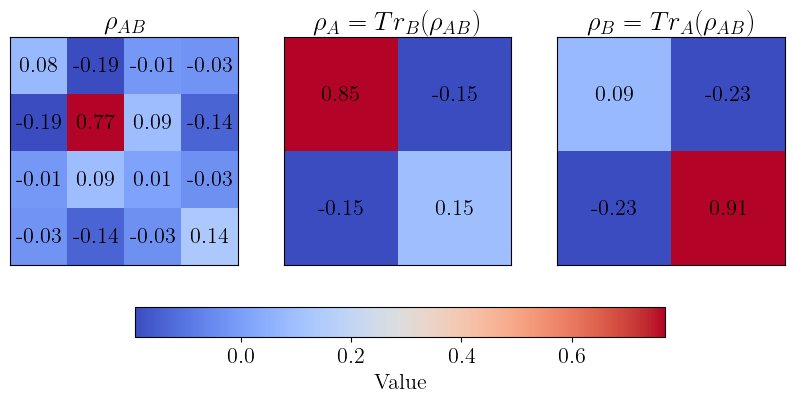

In [9]:
# Plot the heatmaps
plot_density_matrix(rho, rho1, rho2, savefig="heatmp_random_state.pdf")

# Two spin-1/2 qubits test

Check the correctness of the code against known systems, i.e., systems with known analytical solution

In [ ]:
# Define the computational basis vectors:
# |0> = (1, 0)
# |1> = (0, 1)
ket0 = [1,0]
ket1 = [0,1]

phi = [ket0, ket1]
subsystems_dims = [2, 2]

In [ ]:
# Test for the separable state, simply the tensor product of |0> and |1>
chi = tensor_prod(subsystems_dims, phi)
print("Separable state:")
print(chi, "\n")

# Compute Density Matrix
d = density_matrix(chi)
matrix_checkpoints(2, d, debug=True)  # Check if d is a density matrix
print("Density matrix")
print(d)
print(f"Trace(rho) = {density_trace(d):.4f}")
print(f"Trace(rho^2) = {purity(d):.4f}\n")

# Compute Reduced Matrices
dA = reduced_density_matrix(d, dims=[2,2], choose_subsystem=0)
matrix_checkpoints(2, dA, debug=True)  # Check if dA is a density matrix

dB = reduced_density_matrix(d, dims=[2,2], choose_subsystem=1)
matrix_checkpoints(2, dB, debug=True)  # Check if dB is a density matrix

print("Reduced Density Matrix A")
print(dA)
print(f"Trace(rhoA) = {density_trace(dA):.4f}")
print(f"Trace(rhoA^2) = {purity(dA):.4f}")

print("\nReduced Density Matrix B")
print(dB)
print(f"Trace(rhoB) = {density_trace(dB):.4f}")
print(f"Trace(rhoB^2) = {purity(dB):.4f}")

Separable state:
[0 1 0 0] 

Density matrix
[[0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Trace(rho) = 1.0000
Trace(rho^2) = 1.0000

Reduced Density Matrix A
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Trace(rhoA) = 1.0000+0.0000j
Trace(rhoA^2) = 1.0000+0.0000j

Reduced Density Matrix B
[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Trace(rhoB) = 1.0000+0.0000j
Trace(rhoB^2) = 1.0000+0.0000j


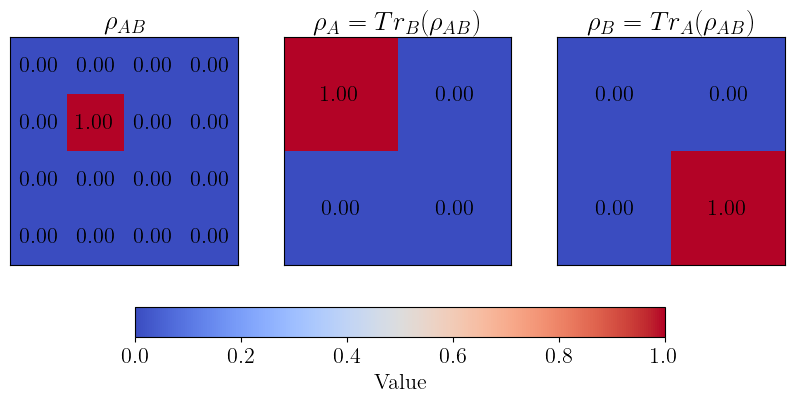

In [12]:
# Plot the heatmaps
plot_density_matrix(d, dA, dB, savefig="heatmp_separable_state.pdf")

In [ ]:
# Test for the General State, e.g., the Bell State |\Phi+> = 1/sqrt(2) (|00> + |11>)
psi = general_pure_state([2, 2], subsys_vectors=phi)
print("General state:")
print(psi, "\n")

# Compute Density Matrix
rho = density_matrix(psi)
matrix_checkpoints(2, rho, debug=True)  # Check if rho is a density matrix
print("Density matrix")
print(rho)
print(f"Trace(rho) = {density_trace(rho):.4f}")
print(f"Trace(rho^2) = {purity(rho):.4f}\n")

# Compute Reduced Matrices
rhoA = reduced_density_matrix(rho, dims=[2,2], choose_subsystem=0)
matrix_checkpoints(2, rhoA, debug=True)  # Check if rhoA is a density matrix

rhoB = reduced_density_matrix(rho, dims=[2,2], choose_subsystem=1)
matrix_checkpoints(2, rhoB, debug=True)  # Check if rhoB is a density matrix

# Print the results
print("Reduced Density Matrix A")
print(rhoA)
print(f"Trace(rhoA) = {density_trace(rhoA):.4f}")
print(f"Trace(rhoA^2) = {purity(rhoA):.4f}")

print("\nReduced Density Matrix B")
print(rhoB)
print(f"Trace(rhoB) = {density_trace(rhoB):.4f}")
print(f"Trace(rhoB^2) = {purity(rhoB):.4f}")

General state:
[[0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j]] 

Density matrix
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]
Trace(rho) = 1.0000+0.0000j
Trace(rho^2) = 1.0000+0.0000j

Reduced Density Matrix A
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Trace(rhoA) = 1.0000+0.0000j
Trace(rhoA^2) = 0.5000+0.0000j

Reduced Density Matrix B
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Trace(rhoB) = 1.0000+0.0000j
Trace(rhoB^2) = 0.5000+0.0000j


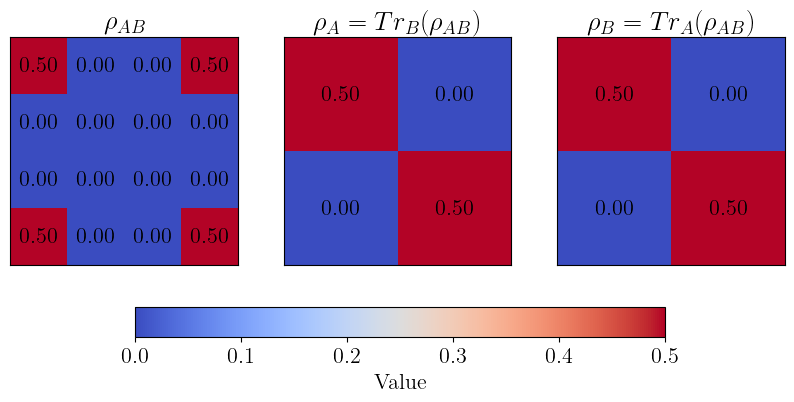

In [14]:
# Plot the heatmaps
plot_density_matrix(rho, rhoA, rhoB, savefig="heatmp_entangled_state.pdf")

# Von Neumann Entropy

In [ ]:
# Claculate the Von Neumann entropy and Purity for a sweep of states
# |psi(theta)> = cos(theta)|01> + sin(theta)|10>
thetas = np.linspace(0, np.pi/2, 100)
entropies = []
purities = []

# Consider the computational basis as before
ket0 = np.array(ket0)
ket1 = np.array(ket1)

# Loop over the angles
for theta in thetas:
    # Construct the state
    psi = np.cos(theta)*np.kron(ket0, ket1) + np.sin(theta)*np.kron(ket1, ket0)
    
    # Total and partial density matrices
    rho = density_matrix(psi)
    rho_left = reduced_density_matrix(rho, subsystems_dims, choose_subsystem=0)
    
    # Save metrics
    entropies.append(von_neumann_entropy(rho_left))
    purities.append(purity(rho_left))

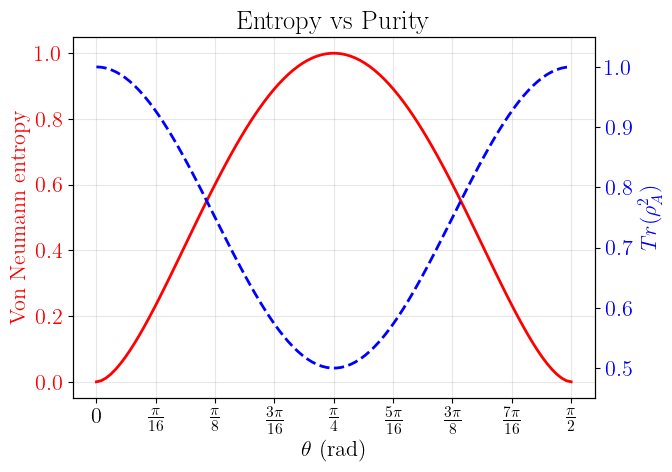

In [16]:
# Plot
fig, ax1 = plt.subplots(figsize=(7, 5))

# Left y-axis Entropy
ax1.set_xlabel(r"$\theta$ (rad)")
ax1.set_ylabel("Von Neumann entropy", color="red")
ax1.plot(thetas, entropies, color="red", linewidth=2, label='Entropy')
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, alpha=0.3)

# Right y-axis Purity
ax2 = ax1.twinx() 
ax2.set_ylabel("$Tr(\\rho_A^2)$", color="blue")
ax2.plot(thetas, purities, color="blue", linewidth=2, linestyle="dashed", label='Purity')
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylim(0.45, 1.05)

# Angle ticks
xticks = np.linspace(0, np.pi/2, 9)
xtick_labels = [
    r"$0$", r"$\frac{\pi}{16}$", r"$\frac{\pi}{8}$", r"$\frac{3\pi}{16}$",
    r"$\frac{\pi}{4}$", r"$\frac{5\pi}{16}$", r"$\frac{3\pi}{8}$",
    r"$\frac{7\pi}{16}$", r"$\frac{\pi}{2}$"
]

ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels)

plt.title("Entropy vs Purity")
plt.tight_layout()
plt.savefig("entropy_purity_sweep.pdf")
plt.show()